In [1]:
# Notebook created by: Nazmi Asri

# One of optimization algorithm commonly used together in machine learning 
# is Stochastic Gradient Descent.
# It is used to learn the coefficients for a simple linear regression model 
# by minimizing the error on a training dataset

# Simple linear regression: when we have single input and we want to use linear regression
# y = B0 + B1 * X
# B0 and B1 are the coefficients that we want to estimate
# B0 is the y-intercept and B1 is the gradient or slope

# The process of SGD involves knowing the form of the cost as well as the derivative 
# so that from a given point you know the gradient and can move in that direction, 
# e.g. downhill towards the minimum value.

# The way this works is that each training instance is shown to the model one at a time. 
# The model makes a prediction for a training instance, the error is calculated 
# and the model is updated in order to reduce the error for the next prediction.

# This procedure can be used to find the set of coefficients in a model that result in 
# the smallest error for the model on the training data. Each iteration the coefficients, 
# called weights (w) in machine learning language are updated using the equation:
# w = w – alpha * delta
# w is the weight, alpha is the learning rate, and 
# delta is the error for the model on the training data attributed to the weight

# B0 and B1 are initialized as 0, using the predicted output and actual output, error are calculated.
# The error is then used in the gradient descent algorithm to update the coefficient
# B0(t+1) = B0(t) – alpha * error
# B1(t+1) = B1(t) – alpha * error * x

# If the data happen to be multivariate, 
# y = b0 + b1 * x1 + b2 * x2 + ...
# B0(t+1) = B0(t) – alpha * error
# B1(t+1) = B1(t) – alpha * error * x1
# B2(t+1) = B2(t) – alpha * error * x2

# Sources: http://machinelearningmastery.com/linear-regression-tutorial-using-gradient-descent-for-machine-learning/
#          http://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/

In [2]:
# To implement this, lets code it !

# We will be using Wine Quality Datasets (winequality-white.csv)
# This dataset is comprised of the details of 4,898 white wines including measurements like acidity and pH. 
# The goal is to use these objective measures to predict the wine quality on a scale between 0 and 10.

# Link to the dataset: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

# 3 parts: 
#       1) Making Predictions
#       2) Estimating Coefficients
#       3) Wine Quality Prediction

In [3]:
# Import dependencies
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from csv import reader
from math import sqrt

Expected=1.000, Predicted=1.200
Expected=3.000, Predicted=2.000
Expected=3.000, Predicted=3.600
Expected=2.000, Predicted=2.800
Expected=5.000, Predicted=4.400


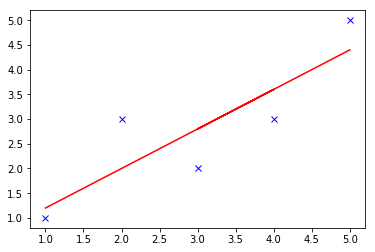

In [4]:
# 1) Make predictions

# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat

# Test dataset
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

# Test coefficient
coef = [0.4, 0.8]

for row in dataset:
	yhat = predict(row, coef)
	print("Expected=%.3f, Predicted=%.3f" % (row[-1], yhat))

x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
yhat = [predict(row, coef) for row in dataset]

# Display graph of x and y
plt.plot(x, y, 'bx')
plt.plot(x, yhat, 'r')
plt.show()

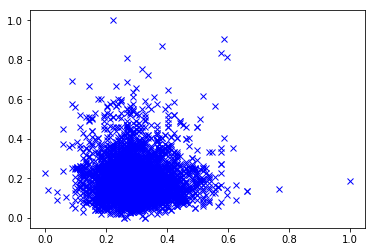

In [5]:
# Dataset initialization

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip().replace('\ufeff', ''))

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		# Skip the first header row
		next(csv_reader, None)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
            
# Load and prepare data
filename = 'winequality-white.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)

# Normalization
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
    
# Display graph of x and y
plt.plot(x, y, 'bx')
plt.show()

In [6]:
# 2) Estimating Coefficients

# 2 parameters of SGD: Learning rate, epoches
# 3 loops:
#      1) Loop over each epoch.
#      2) Loop over each row in the training data for an epoch.
#      3) Loop over each coefficient and update it for a row in an epoch.

# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			yhat = predict(row, coef)
			error = yhat - row[-1]
			coef[0] = coef[0] - l_rate * error
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
			# print(l_rate, n_epoch, error)
	return coef

# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
	predictions = list()
	coef = coefficients_sgd(train, l_rate, n_epoch)
	for row in test:
		yhat = predict(row, coef)
		predictions.append(yhat)
	return(predictions)

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		rmse = rmse_metric(actual, predicted)
		scores.append(rmse)
	return scores

# Linear Regression on wine quality dataset
seed(1)

# Evaluate algorithm
n_folds = 5
l_rate = 0.01
n_epoch = 50
scores = evaluate_algorithm(dataset, linear_regression_sgd, n_folds, l_rate, n_epoch)

print('Scores: %s' % scores)
print('Mean RMSE: %.3f' % (sum(scores)/float(len(scores))))

Scores: [0.12248058224159092, 0.13034017509167112, 0.12620370547483578, 0.12897687952843237, 0.12446990678682233]
Mean RMSE: 0.126
